In [1]:
import torch
import torchvision
from torchsummary import summary
from torchvision.models.vgg import vgg16
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline


In [2]:
model = vgg16(pretrained=True)


summary(model,(3,224, 224))

c:\Users\hoang\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\hoang\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

# Visualize filters

## See network conv layer info

In [3]:
for layer in model.features:
    if isinstance(layer, torch.nn.modules.conv.Conv2d):
        # Expected: [out_channels, in_channels/ groups, kernel_size[0], kernel_size[1]]
        print(f"{type(layer)}: {layer.weight.shape}")

<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([64, 3, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([64, 64, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([128, 64, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([128, 128, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([256, 128, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([256, 256, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([256, 256, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([512, 256, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([512, 512, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([512, 512, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([512, 512, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([512, 512, 3, 3])
<class 'torch.nn.modules.conv.Conv2d'>: torch.Size([512, 512, 3, 3])


In [4]:
filters = model.features[0].weight

In [5]:
f_min, f_max = filters.min(), filters.max()
f_min, f_max

(tensor(-1.2726, grad_fn=<MinBackward1>),
 tensor(1.0734, grad_fn=<MaxBackward1>))

In [6]:
filters = (filters - f_min) / (f_max - f_min)

## Visualize 6 filters of 64 filters in first conv layer

In [7]:
filters[1, :, :, :]

tensor([[[0.6416, 0.5964, 0.6218],
         [0.3600, 0.4387, 0.6474],
         [0.4356, 0.6029, 0.5401]],

        [[0.4824, 0.4491, 0.6066],
         [0.1838, 0.3925, 0.7829],
         [0.4393, 0.7638, 0.7723]],

        [[0.4085, 0.3845, 0.4866],
         [0.3415, 0.4764, 0.6899],
         [0.5656, 0.7926, 0.7538]]], grad_fn=<SliceBackward0>)

In [8]:
filters[1, :, :, :].detach().numpy()

array([[[0.6415738 , 0.5964419 , 0.6217599 ],
        [0.35998657, 0.43866137, 0.6474338 ],
        [0.43560255, 0.60288286, 0.54011244]],

       [[0.48244894, 0.44908798, 0.6065644 ],
        [0.18384762, 0.39250937, 0.7828551 ],
        [0.43931836, 0.76380074, 0.7722724 ]],

       [[0.40846545, 0.38452896, 0.48663726],
        [0.34149143, 0.47636524, 0.68989223],
        [0.5656331 , 0.7925958 , 0.7537935 ]]], dtype=float32)

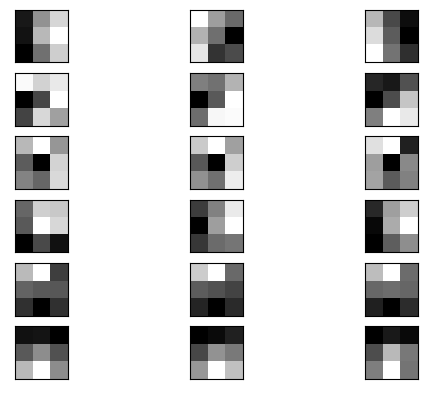

In [9]:
n_filters, ix = 6, 1

for i in range(n_filters):
    f = filters[i, :, :, :].detach().numpy()
    
    # Plot each channel separately
    for j in range(3):
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        
        # Plot filter channel in gray scale
        plt.imshow(f[j, :, :], cmap='gray')
        ix +=1
        
plt.show()

# Visualize feature maps

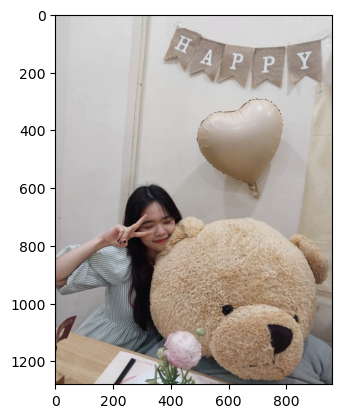

In [10]:

img_path = "./assets/content_imgs/em.jpg"

img = Image.open(img_path)

plt.imshow(img)
plt.show()

In [11]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((224, 224))
])

input_img = transform(img)

input_img

c:\Users\hoang\anaconda3\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


tensor([[[0.7882, 0.7882, 0.7882,  ..., 0.8667, 0.8563, 0.8563],
         [0.7829, 0.7919, 0.7882,  ..., 0.8667, 0.8667, 0.8667],
         [0.7829, 0.7919, 0.7882,  ..., 0.8667, 0.8667, 0.8667],
         ...,
         [0.7163, 0.7519, 0.7277,  ..., 0.3713, 0.3585, 0.3409],
         [0.7486, 0.4318, 0.3884,  ..., 0.3037, 0.3254, 0.3300],
         [0.3585, 0.3342, 0.3471,  ..., 0.2910, 0.2706, 0.3514]],

        [[0.7882, 0.7882, 0.7882,  ..., 0.8667, 0.8563, 0.8563],
         [0.7829, 0.7919, 0.7882,  ..., 0.8667, 0.8667, 0.8667],
         [0.7829, 0.7919, 0.7882,  ..., 0.8667, 0.8667, 0.8667],
         ...,
         [0.6684, 0.6886, 0.6300,  ..., 0.3848, 0.3619, 0.3342],
         [0.6475, 0.3264, 0.2691,  ..., 0.3171, 0.3288, 0.3233],
         [0.2572, 0.2487, 0.2630,  ..., 0.3045, 0.2739, 0.3447]],

        [[0.7882, 0.7882, 0.7882,  ..., 0.8667, 0.8563, 0.8563],
         [0.7829, 0.7919, 0.7882,  ..., 0.8667, 0.8667, 0.8667],
         [0.7829, 0.7919, 0.7882,  ..., 0.8667, 0.8667, 0.

(224, 224)


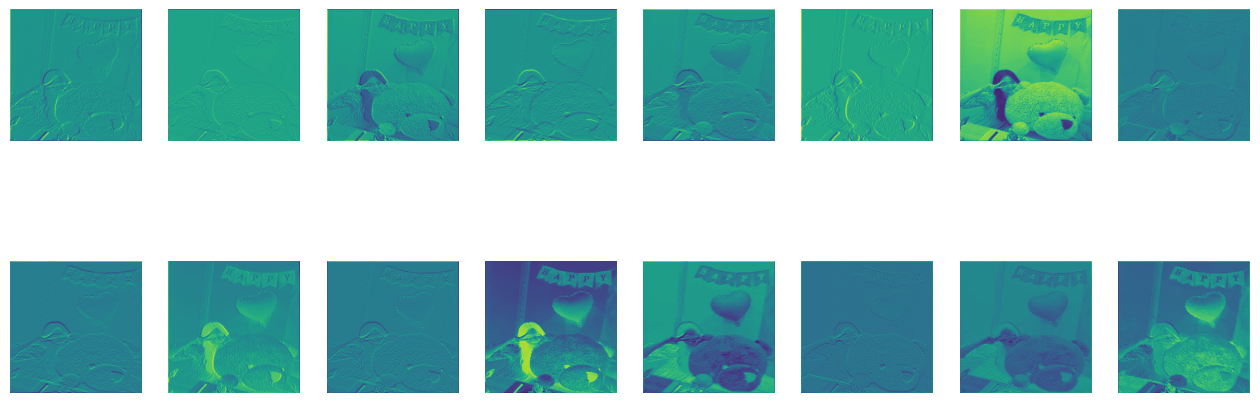

(224, 224)


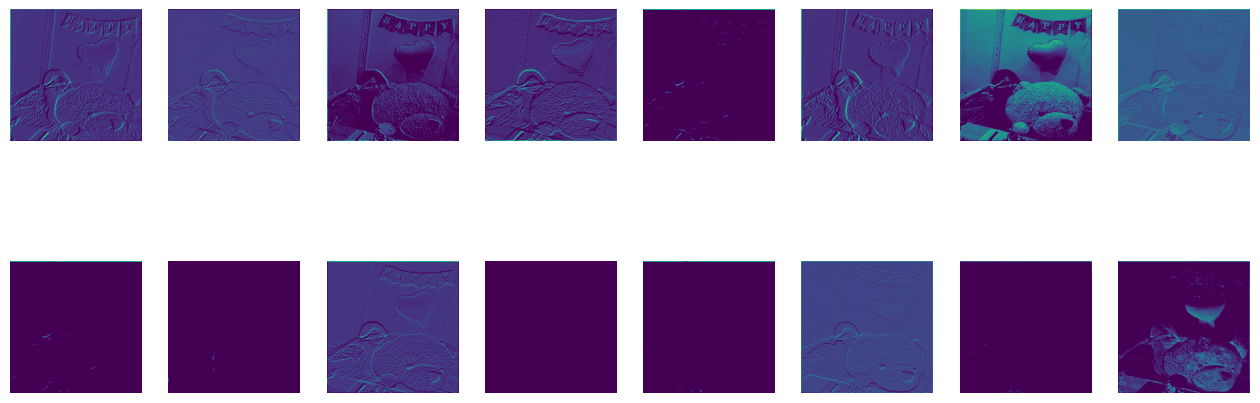

(224, 224)


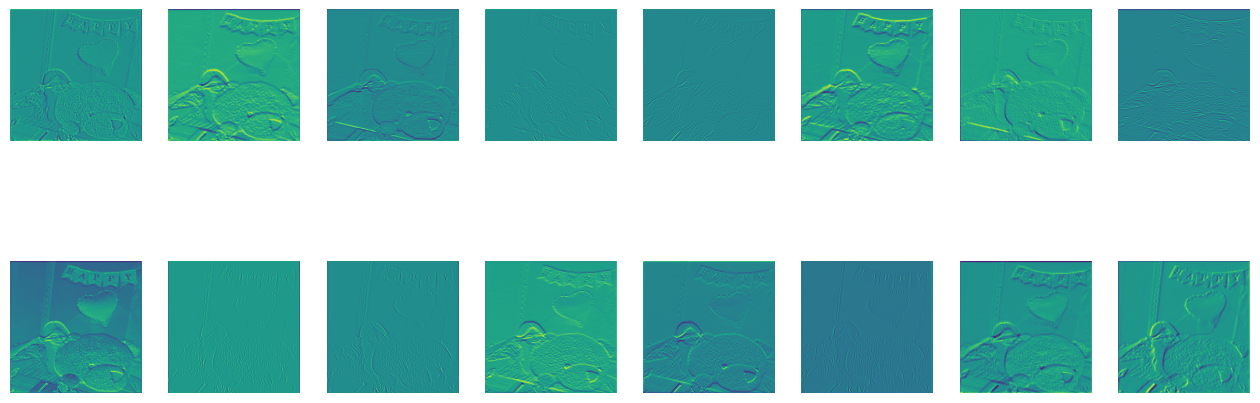

(224, 224)


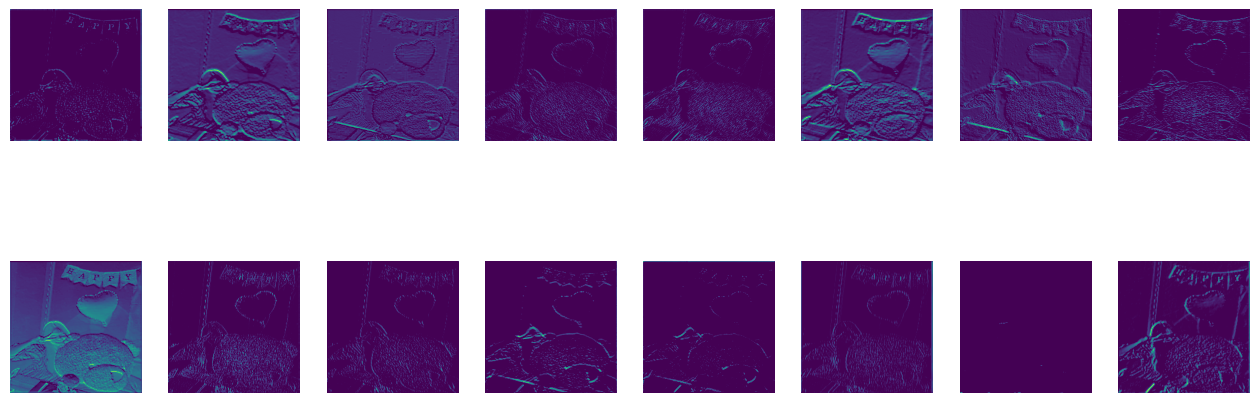

(112, 112)


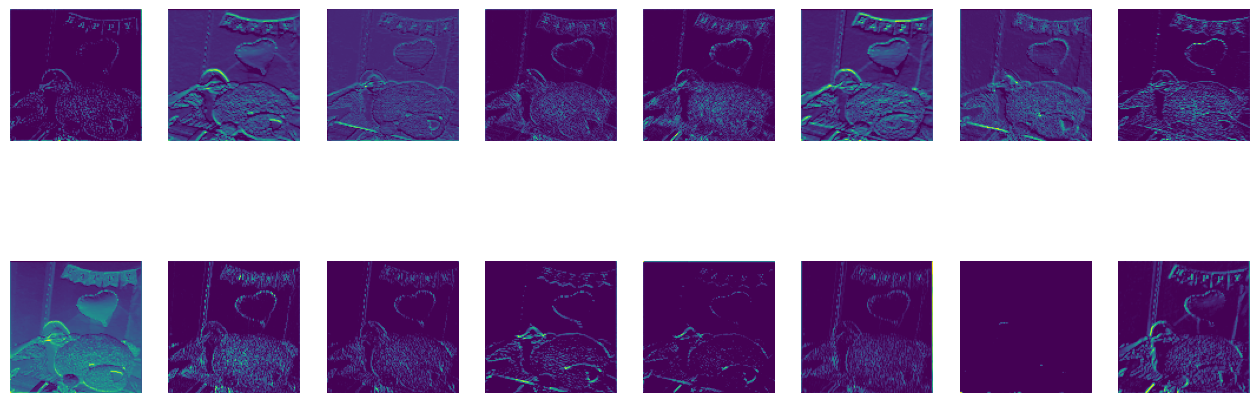

(112, 112)


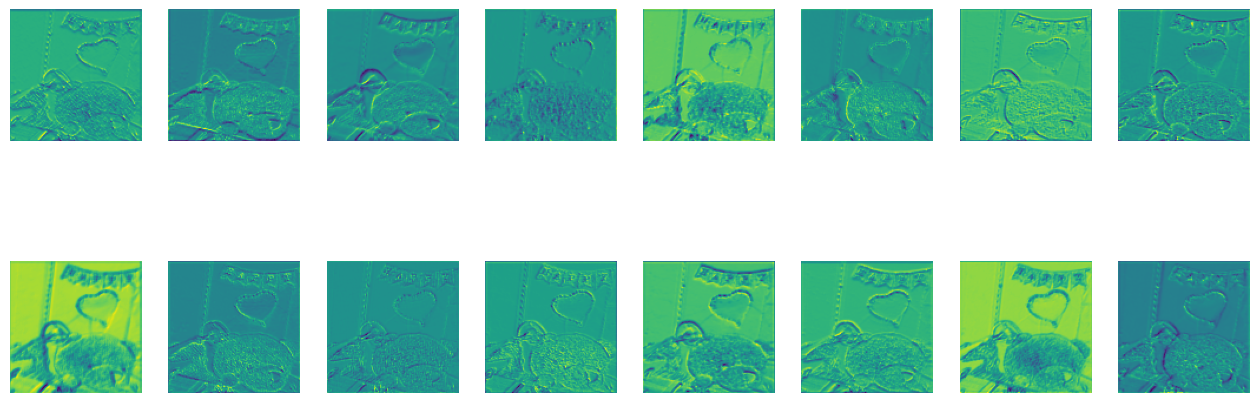

(112, 112)


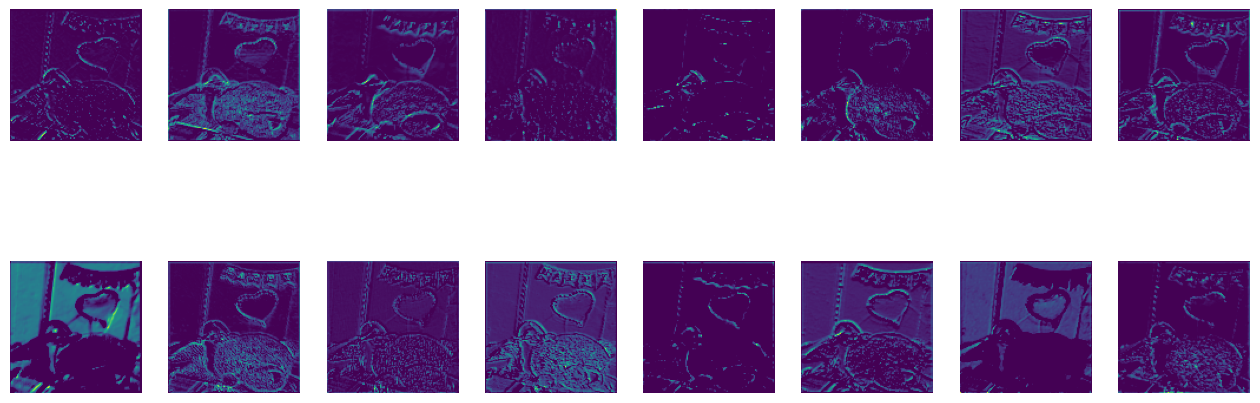

(112, 112)


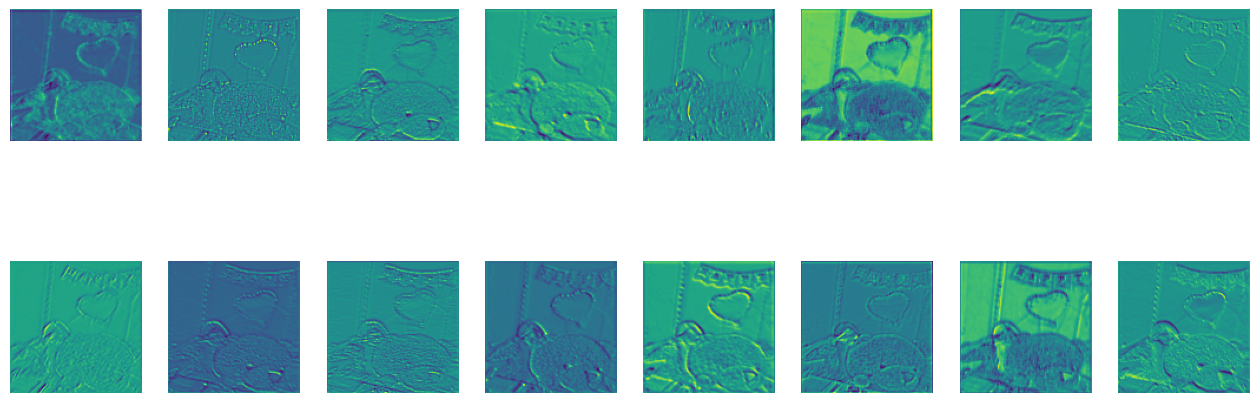

(112, 112)


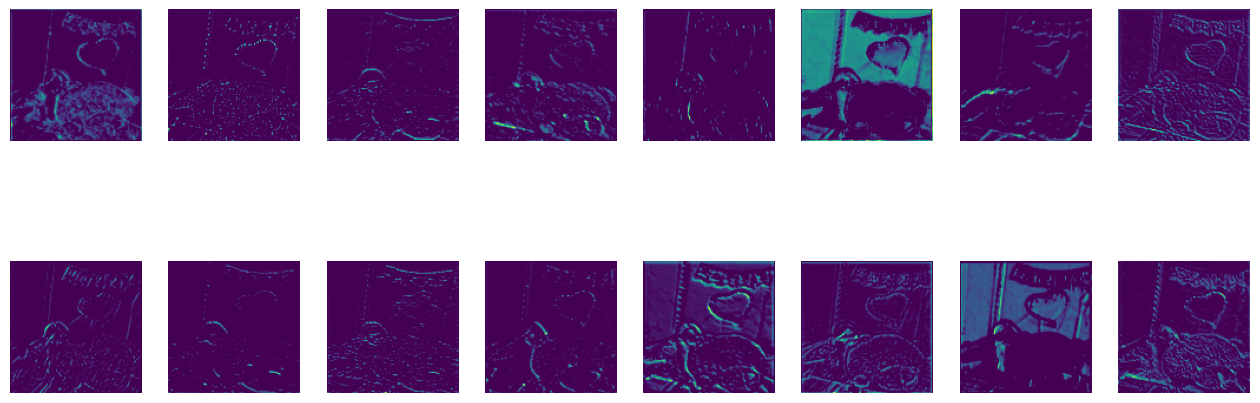

(56, 56)


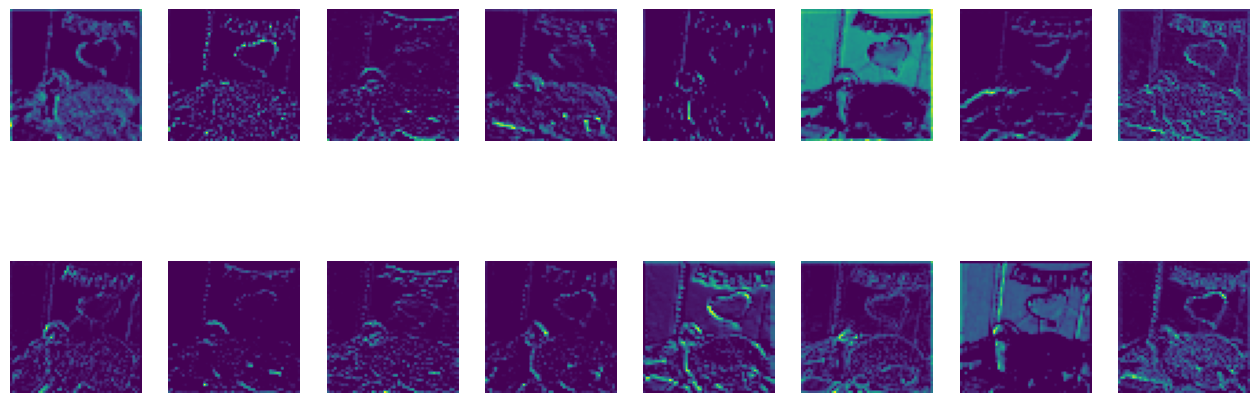

(56, 56)


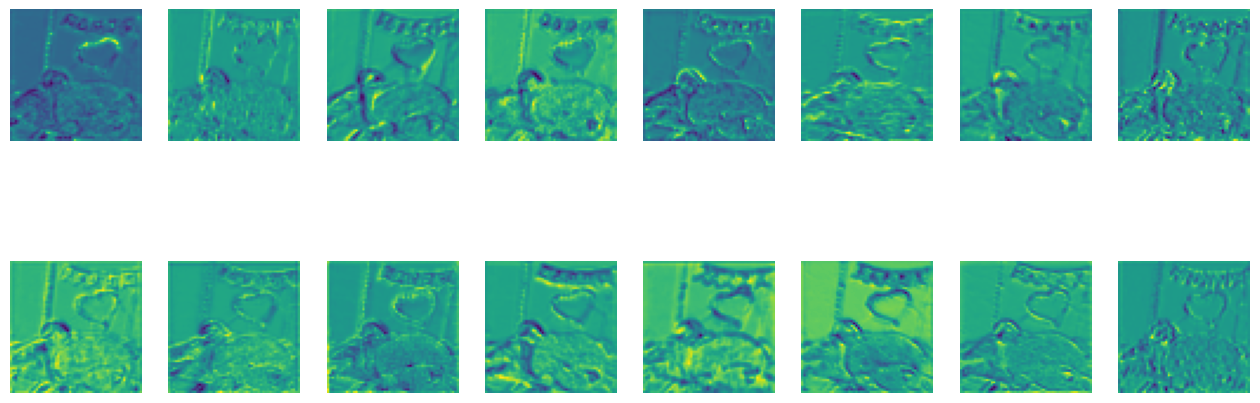

(56, 56)


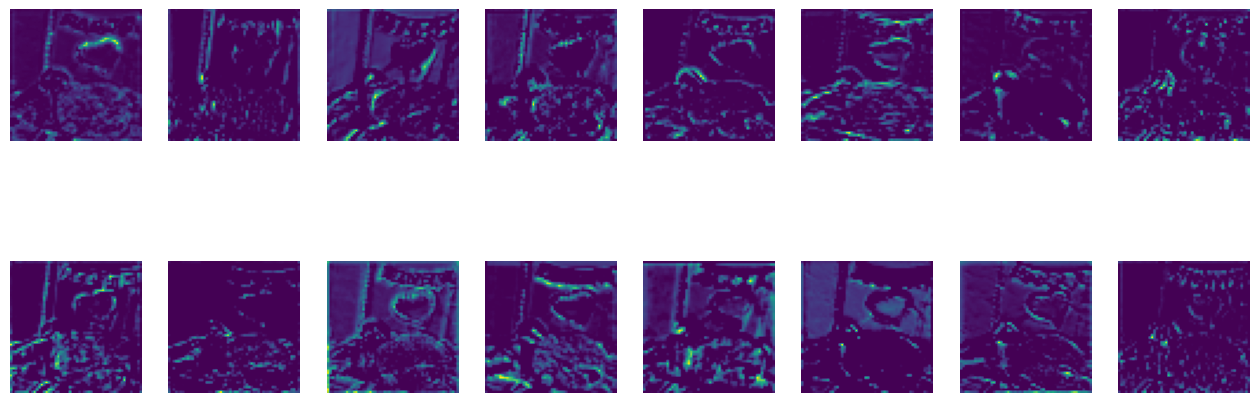

(56, 56)


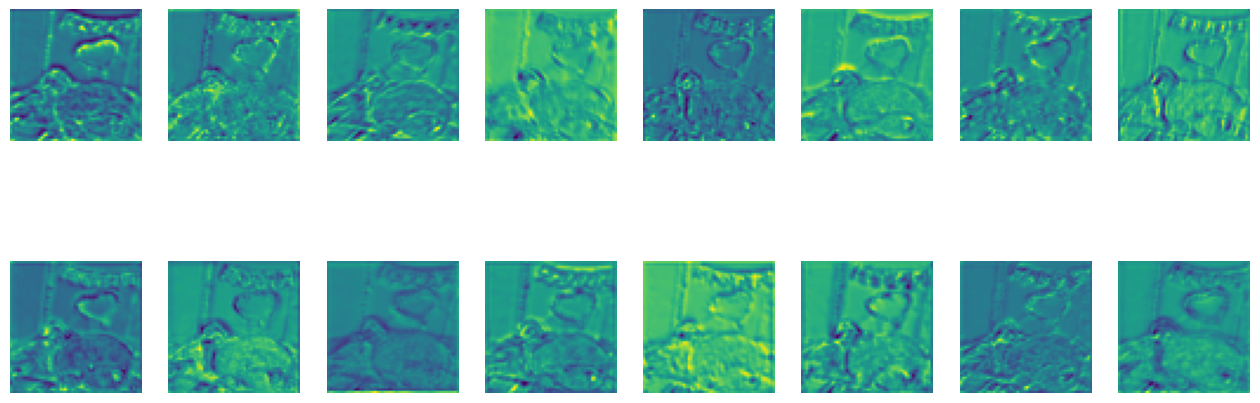

(56, 56)


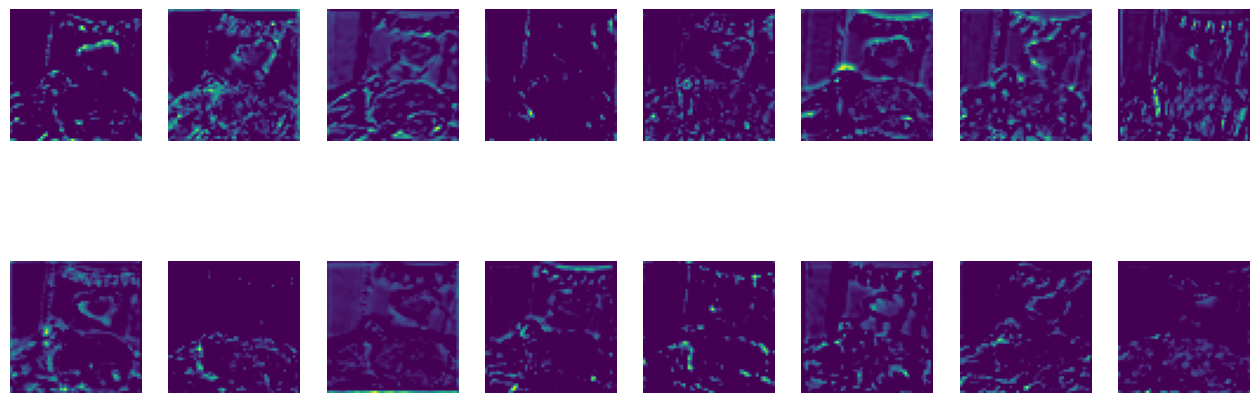

(56, 56)


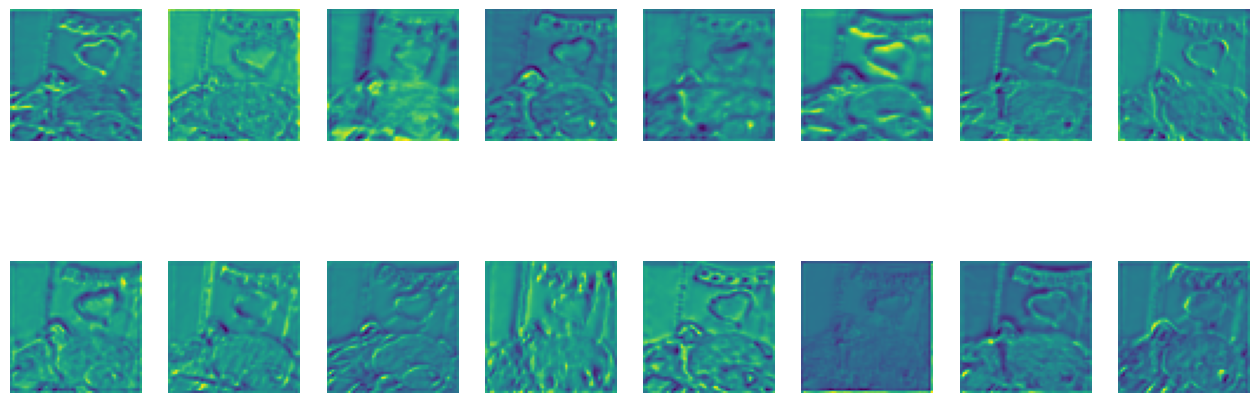

(56, 56)


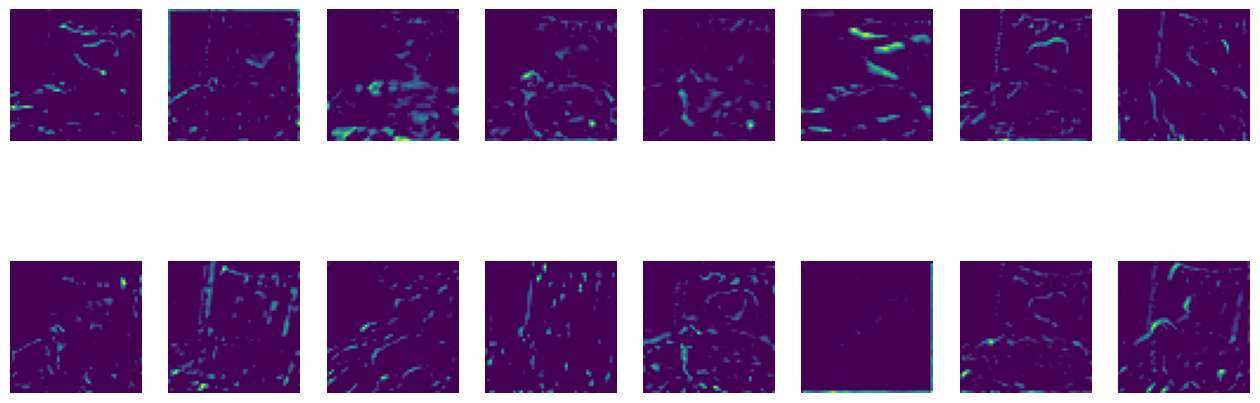

(28, 28)


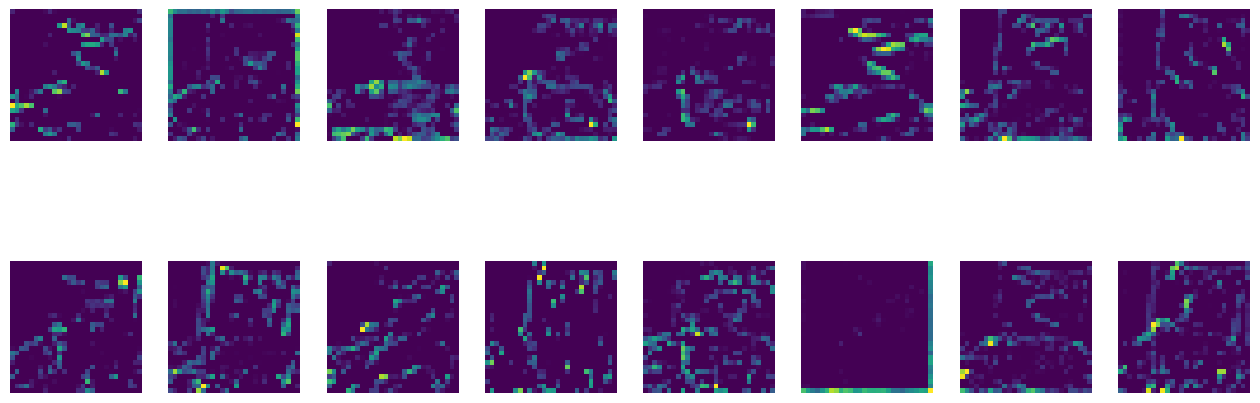

(28, 28)


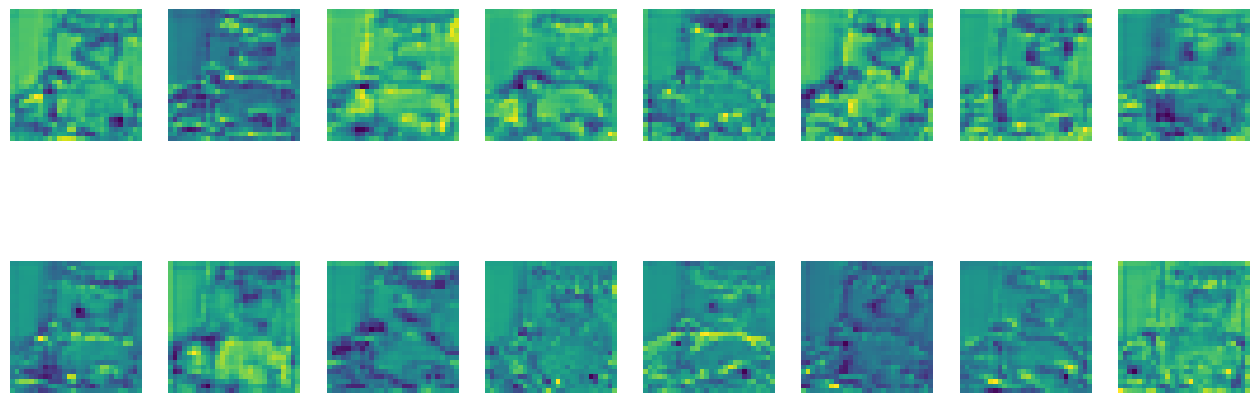

(28, 28)


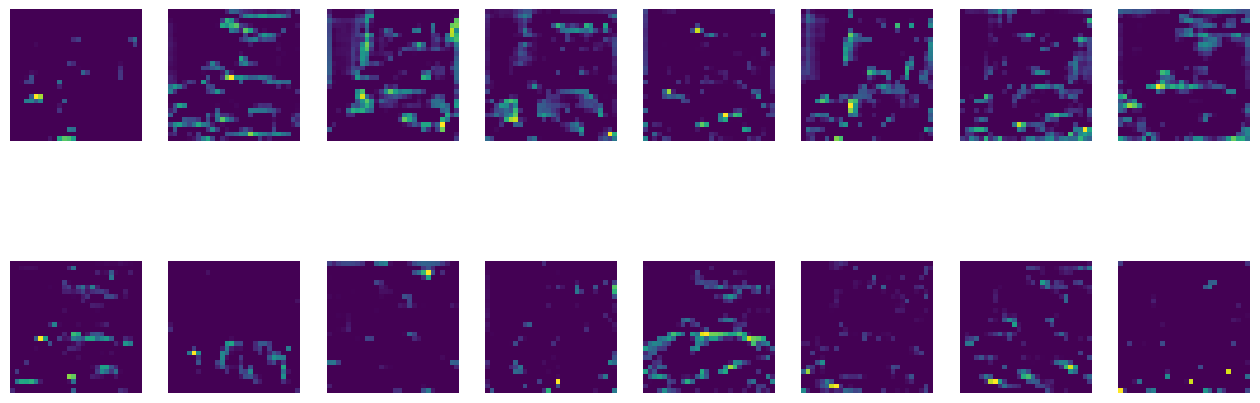

(28, 28)


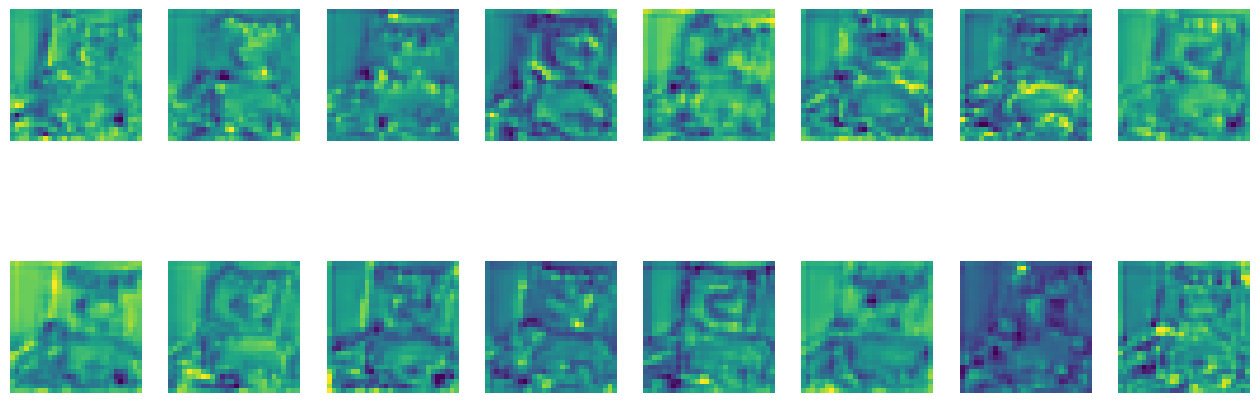

(28, 28)


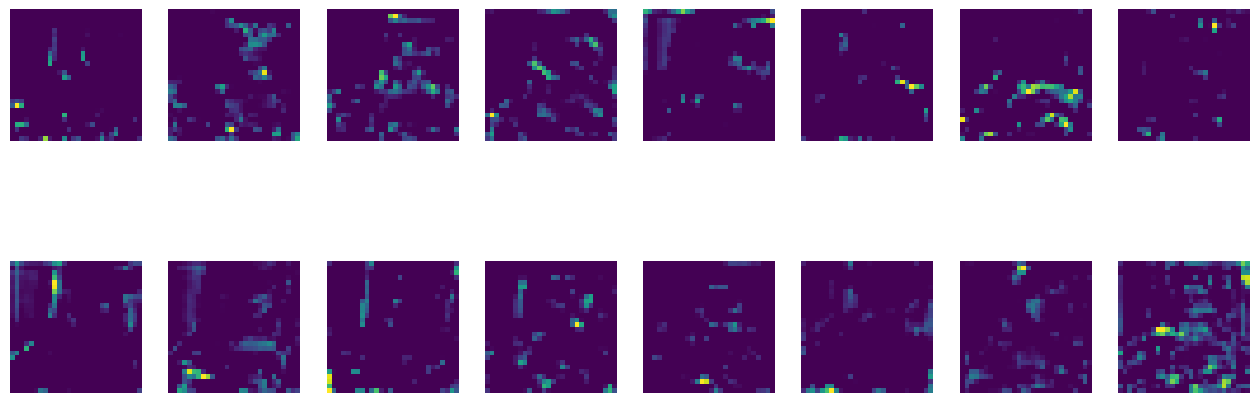

(28, 28)


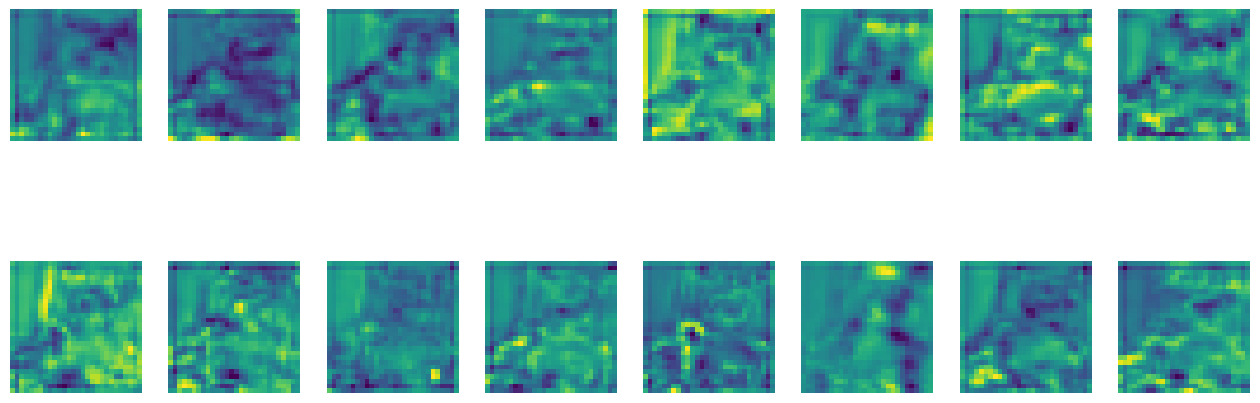

(28, 28)


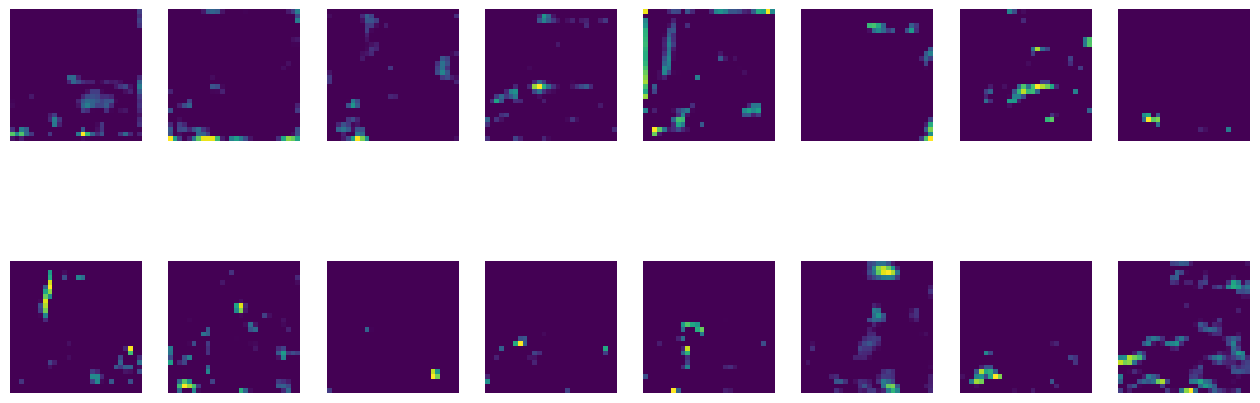

(14, 14)


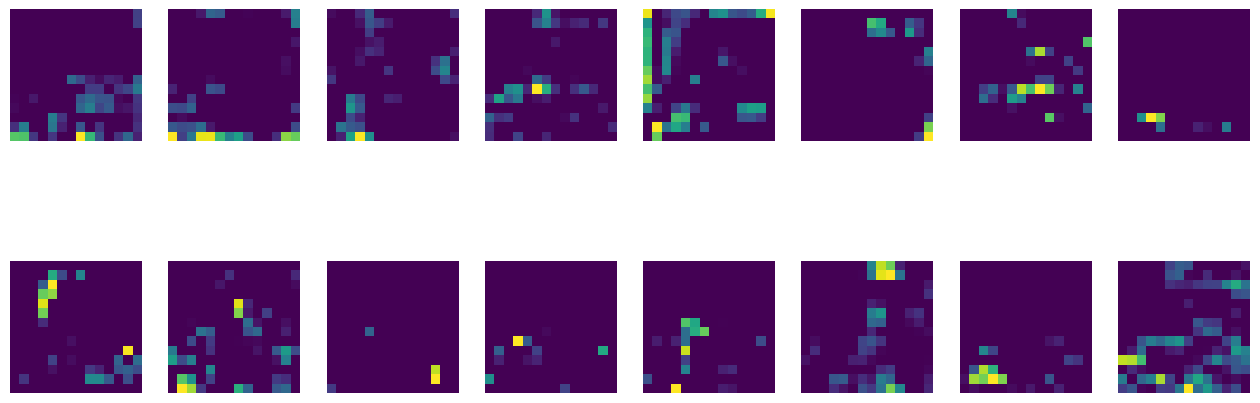

(14, 14)


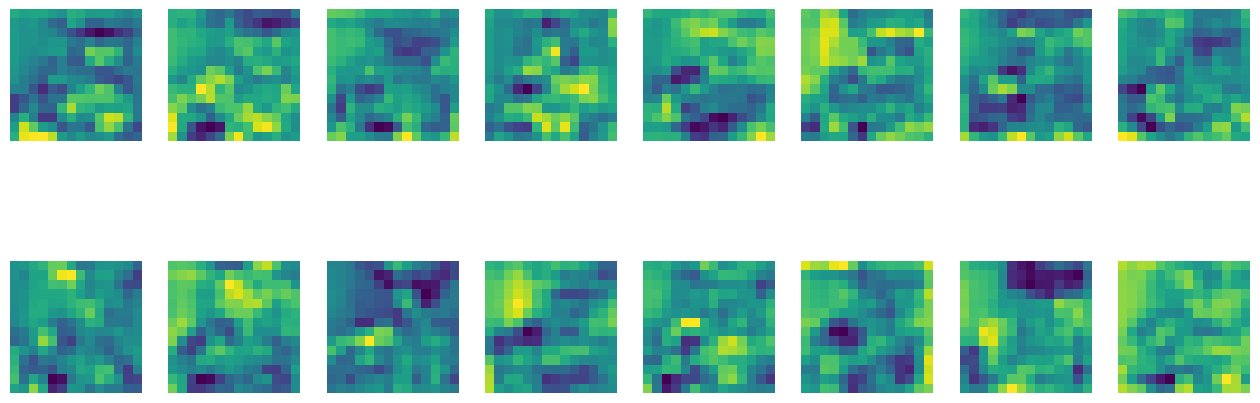

(14, 14)


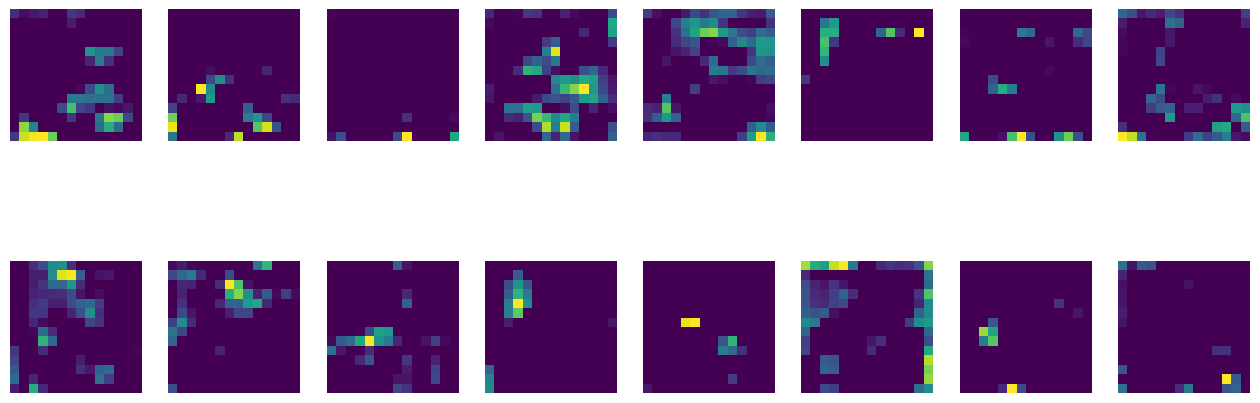

(14, 14)


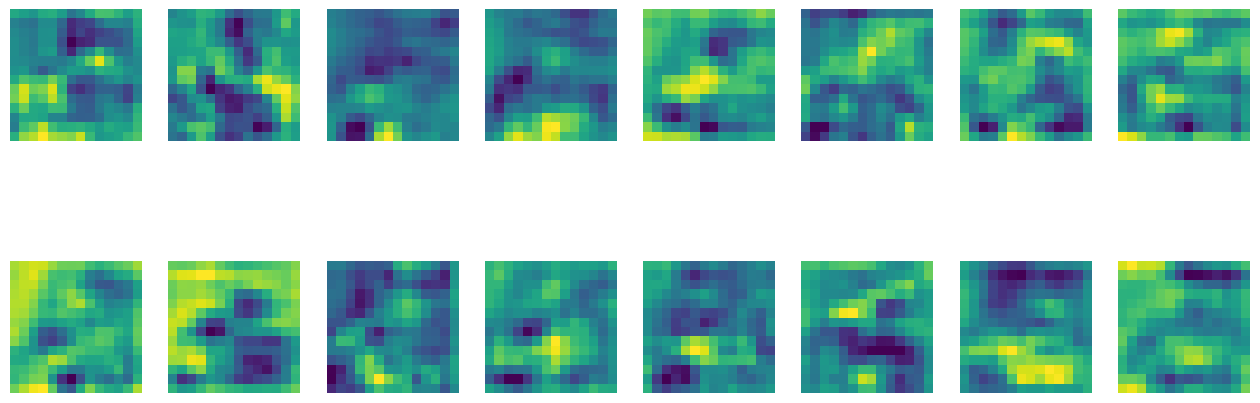

(14, 14)


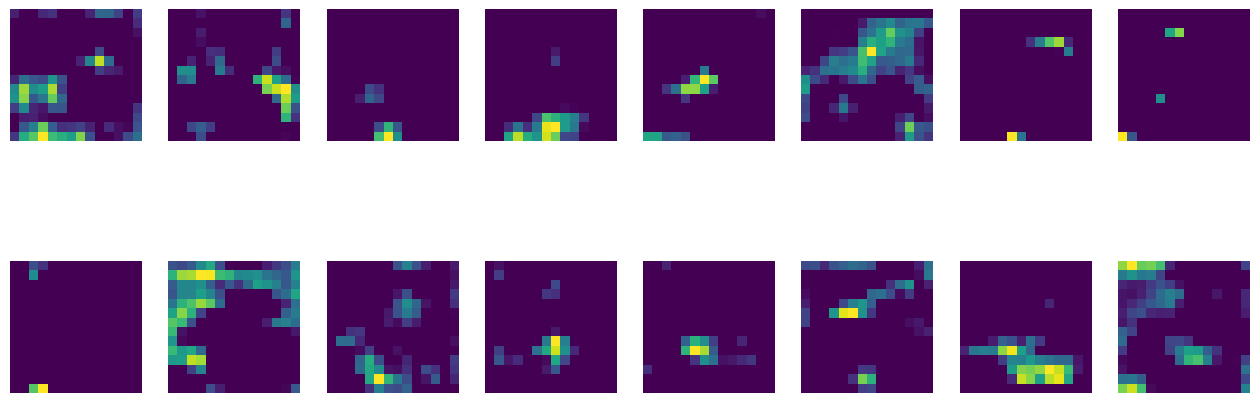

(14, 14)


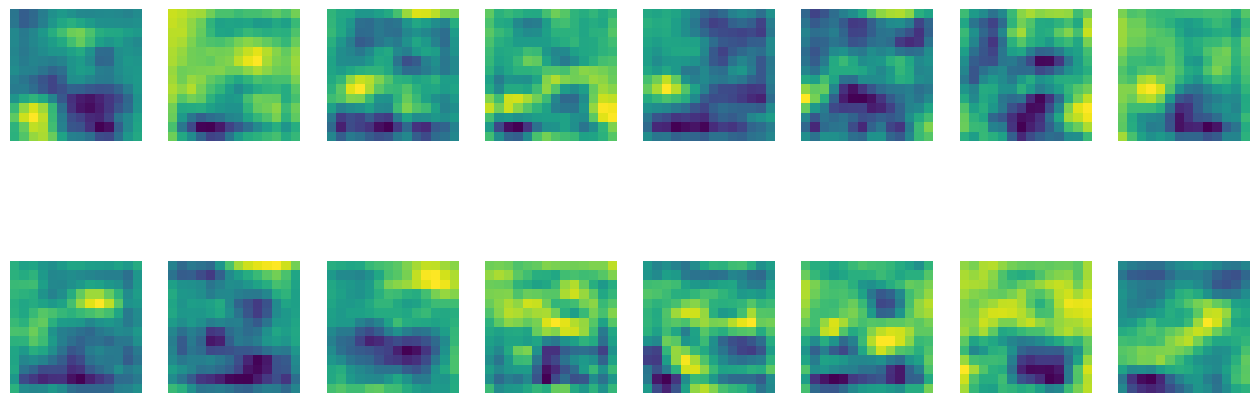

(14, 14)


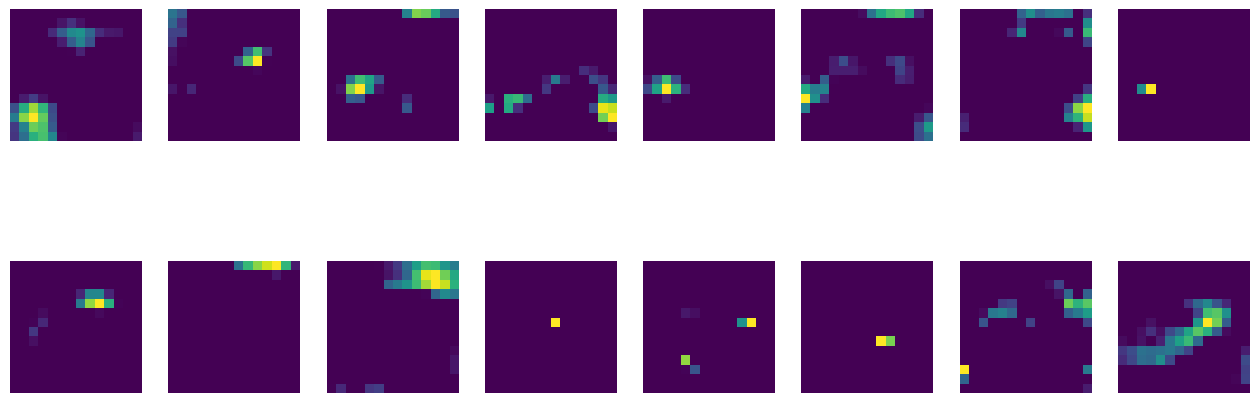

(7, 7)


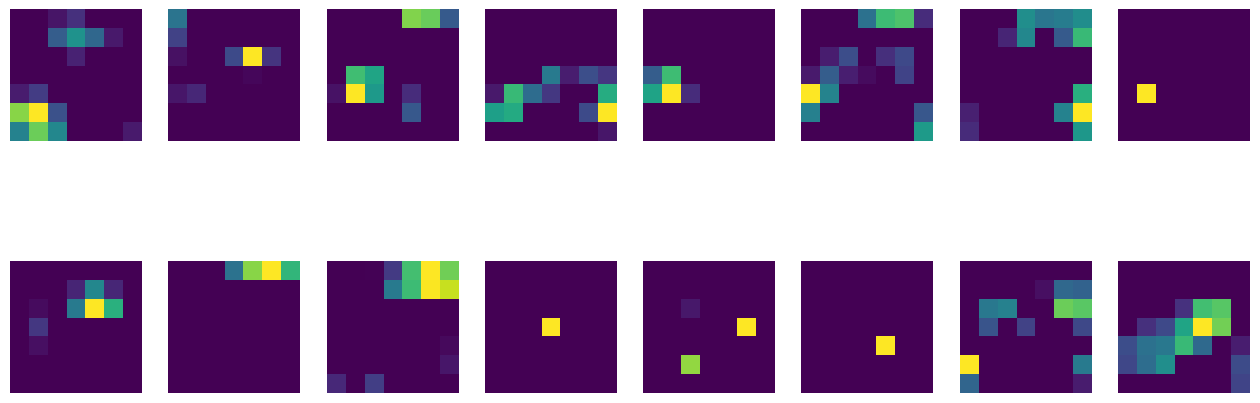

In [30]:
out = input_img

for layer in model.features:
    features = layer(out)
    out = features
    print(out.detach().numpy()[0].shape)
    plt.figure(figsize=(16, 6))
    for i in range(1,17):
        plt.subplot(2, 8, i)
        plt.imshow(out.detach().numpy()[i], cmap='viridis')
        plt.axis('off')
        
    plt.show()
    